Accuracy for KNN: 0.93075
0.8987551784756499
Accuracy for KNN: 0.941
0.9122550971109912
Accuracy for KNN: 0.938
0.9090077944121054
Accuracy for KNN: 0.94275
0.9105065647466215
Accuracy for KNN: 0.9365
0.9107547019865305
Accuracy for KNN: 0.93575
0.9115044010836282
Accuracy for KNN: 0.935
0.9082477557150174
Accuracy for KNN: 0.934
0.9072458550234985
Accuracy for KNN: 0.9315
0.9069883665204818
Accuracy for KNN: 0.93
0.9064986588124476
Accuracy for KNN: 0.92875
0.9047408285460815
Accuracy for KNN: 0.927
0.9034951692709428
Accuracy for KNN: 0.9255
0.9032539133389822
Accuracy for KNN: 0.923
0.9012566887681485
Accuracy for KNN: 0.92375
0.8995141491457697
Accuracy for KNN: 0.92125
0.8977512866982837
Accuracy for KNN: 0.9205
0.8970109202304913
Accuracy for KNN: 0.92075
0.8965084193752532
Accuracy for KNN: 0.91875
0.8955177743112549
Accuracy for KNN: 0.9175
0.8935205552097363


Text(0, 0.5, 'Accuracy %')

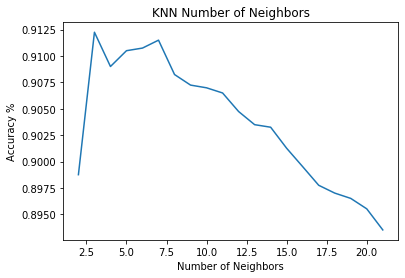

In [2]:
import sklearn
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter



df = pd.read_csv('mnist_train.csv')
#pulling data from given train file to pandas dataframe

y = df["label"][:10000]
#seperateing labels

x = df.drop('label', axis =1)[:10000]
#seperateing features

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x)

#x = principalComponents

#testing out using PCA for performance
#PCA did not prove to increase accuracy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
#splitting data into training set and test set



Number_of_neighbors=[]
Neighbors=[]
def list (b):
    for i in range(20):
        knn = KNeighborsClassifier(n_neighbors=b, radius=1.0, algorithm='auto', leaf_size=30, metric='euclidean', p=2, metric_params=None, n_jobs=None)
        #optimizing parameters for knn, used euclidean distance of order 2
        knn.fit(X_train, y_train)
        #fitting data to knn classifier

        y_pred = knn.predict(X_test)
        #making predictions on test data based on training data

        from sklearn import metrics

        print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred))
        #finding accuracy of one run
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(knn, X_test, y_test, cv=5)
        #computing cross validation scores from 5 folds of runs
        import statistics
        print(statistics.mean(scores))

        Number_of_neighbors.append(statistics.mean(scores))
        Neighbors.append(b)
        b+=1
        #looping through different knn neighbor values to find what is optimal for accuracy
list(2)



import matplotlib.pyplot as plt
x =Neighbors
y= Number_of_neighbors

plt.plot(x,y)
plt.title (r"KNN Number of Neighbors")
plt.xlabel(r"Number of Neighbors")
plt.ylabel(r"Accuracy %")
#plotting knn neighbor accuracies

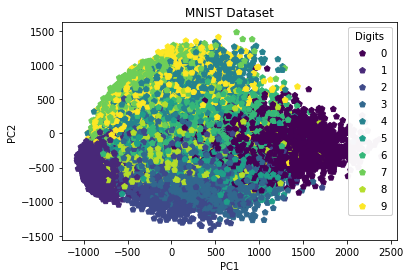

In [58]:
import sklearn
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import seaborn as sns



df = pd.read_csv('mnist_train.csv')
#reading given training data into pandas dataframe

y = df["label"]
#splitting dataframe labels

x = df.drop('label', axis =1)
#splitting datafram features


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

x = principalComponents
#applying PCA to dataset to get 2 features for visualization

dataset = pd.DataFrame({'PC1': x[:, 0], 'PC2': x[:, 1]})
#PCA produces an array, converted to pandas dataframe for ease of use

PC1 = dataset["PC1"]
PC2 = dataset["PC2"]
#seperating the 2 columns of the dataframe


fig, ax = plt.subplots()

scatter = ax.scatter(PC1,PC2, c=y, marker = 'p')
#plotting first two PCA dimensions using matplotlib and sorting by color

legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Digits")
ax.add_artist(legend1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("MNIST Dataset")
#producing a legend for data


plt.show()

Text(0.5, 1.0, 'MNIST Dataset')

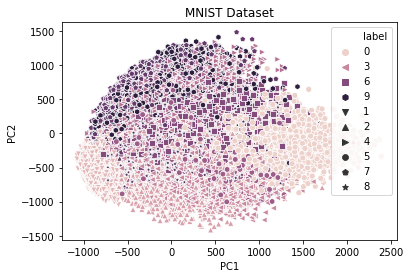

In [59]:
import sklearn
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import seaborn as sns



df = pd.read_csv('mnist_train.csv')
#reading given training data into pandas dataframe

y = df["label"]
#splitting dataframe labels

x = df.drop('label', axis =1)
#splitting dataframe features


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

x = principalComponents
#applying PCA to dataset to get 2 features for visualization

dataset = pd.DataFrame({'PC1': x[:, 0], 'PC2': x[:, 1]})
#PCA produces an array, converted to pandas dataframe for ease of use

PC1 = dataset["PC1"]
PC2 = dataset["PC2"]
#seperating the 2 columns of the dataframe


filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax = sns.scatterplot(x = PC1, y = PC2, hue = y, style = y, markers=filled_markers)
plt.title("MNIST Dataset")
##plotting first two PCA dimensions using seaborn and sorting by shape and color

In [65]:
import sklearn
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter



df = pd.read_csv('mnist_train.csv')
#reading given training data into pandas dataframe

train_y = df["label"]
#splitting dataframe labels

train_x = df.drop('label', axis =1)
#splitting dataframe features


test = pd.read_csv('mnist_test.csv')
#reading test data into another pandas dataframe


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=10, radius=1.0, algorithm='auto', leaf_size=30, metric='euclidean', p=2, metric_params=None, n_jobs=None)
#using knn algorithm optimized above

knn.fit(train_x, train_y)
#fitting data to knn classifier

y_pred = knn.predict(test)
#making predictions on test data based on training data

print(y_pred)
#predicting values from test data

import csv
headers = ['ImageId', 'Label']
#setting headers for csv file
image_id = list(range(1,len(y_pred)+1))
#generating list of numbers for image id

MNIST_Results = open('MNIST_Results.csv', 'w')
with MNIST_Results:
#opening csv file     
    writer = csv.writer(MNIST_Results)
    writer.writerow(image_id)
    writer.writerow(y_pred)
#writing imageid and prediction to rows
    
pd.read_csv('MNIST_Results.csv', header=None).T.to_csv('MNIST_Results.csv', header=headers, index=False)
#transposing rows to columns to fit sample format

[2 0 9 ... 3 9 2]
